In [9]:
from scipy.optimize import minimize
import numpy as np
from spectre.Visualization.ReadH5 import to_dataframe

In [6]:
spin = 0.9
minimize(
    lambda r_isco: np.abs(
        1.0
        - 6.0 / r_isco
        + 8.0 * spin * np.sqrt(1.0 / r_isco**3)
        - 3.0 * spin**2 / r_isco**2
    ),
    x0=6.0,
    bounds=[[2.0, 12.0]],
)

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 4.5796694214672584e-10
        x: [ 2.321e+00]
      nit: 7
      jac: [ 9.495e-02]
     nfev: 94
     njev: 47
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>

In [18]:
# a=0.9, r0=isco, m=1
expected_dpsi_drstar = -0.0242004 - 0.00723707j
expected_F_r = -0.0700412
# a=0.5, r0=6, m=1
dpsi_dr = -0.00320376 + 0.00162401j
F_r = -0.00120398
# m=0
dpsi_dr = 0.00355094
F_r = 0.00123093

# outer radius 350

In [31]:
import h5py

reduction_file = "/Users/nilsvu/Projects/spectre/build-Default-Debug/test_ssf_r6/m_1/ScalarSelfForceReductions.h5"

with h5py.File(reduction_file, "r") as open_h5_file:
    self_force = to_dataframe(open_h5_file["SelfForce.dat"])
self_force

,IterationId,Re(RegularFieldAtPuncture),Im(RegularFieldAtPuncture),Re(DerivRegularFieldAtPuncture_rstar),Im(DerivRegularFieldAtPuncture_rstar),Re(DerivRegularFieldAtPuncture_costheta),Im(DerivRegularFieldAtPuncture_costheta),Re(SelfForce_r),Im(SelfForce_r),Re(SelfForce_theta),Im(SelfForce_theta)
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,-0.000000e+00,0.000000e+00
1,1.0,-0.008533,0.006829,-0.003687,0.001640,2.118102e-14,3.074835e-13,-0.001365,0.000520,-1.041634e-13,-6.075598e-13
2,2.0,-0.002888,0.007230,-0.002611,0.001706,-3.566528e-12,4.207616e-12,-0.001141,0.000546,6.248043e-12,-9.091676e-12
3,3.0,-0.007038,0.006676,-0.003297,0.001630,1.134912e-10,1.821187e-10,-0.001252,0.000522,-2.625573e-10,-3.394901e-10
4,4.0,-0.005355,0.006899,-0.002849,0.001645,4.584793e-11,1.522304e-10,-0.001123,0.000516,-1.219322e-10,-2.936615e-10
5,5.0,-0.007125,0.006680,-0.003196,0.001636,5.764969e-11,-9.602982e-11,-0.001196,0.000518,-9.534301e-11,2.027081e-10
6,6.0,-0.006172,0.006770,-0.003079,0.001638,3.077260e-11,3.586356e-11,-0.001191,0.000520,-6.846488e-11,-6.515482e-11
7,7.0,-0.007120,0.006645,-0.003194,0.001636,2.799133e-12,1.546322e-11,-0.001195,0.000520,-8.688556e-12,-3.020421e-11
8,8.0,-0.006509,0.006707,-0.003166,0.001632,-1.790497e-12,3.060605e-13,-0.001216,0.000521,3.501007e-12,-9.701316e-13


In [22]:
import matplotlib.pyplot as plt

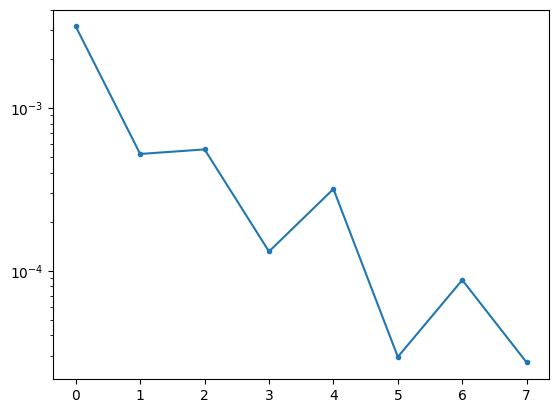

In [32]:
plt.semilogy(
    np.abs(
        self_force["Re(DerivRegularFieldAtPuncture_rstar)"].iloc[:-1]
        - self_force["Re(DerivRegularFieldAtPuncture_rstar)"].iloc[-1]
    ),
    marker=".",
)